#Importing Data For Analysis

In [ ]:
import pandas as pd

# Loading Excel file
file_path = '/content/Fedex_invoice_data.xlsx'
fedex_data = pd.read_excel(file_path)

# Displaying first few rows and the structure of the data
fedex_data.head(), fedex_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1290 entries, 0 to 1289
Columns: 117 entries, Bill to Account Number to Tracking ID Charge Amount.5
dtypes: float64(76), int64(19), object(22)
memory usage: 1.2+ MB


(   Bill to Account Number  Invoice Date  Invoice Number  Store ID  \
 0                     NaN      20240305             NaN       NaN   
 1                     NaN      20240305             NaN       NaN   
 2                     NaN      20240305             NaN       NaN   
 3                     NaN      20240305             NaN       NaN   
 4                     NaN      20240305             NaN       NaN   
 
    Original Amount Due  Current Balance    Payor  Ground Tracking ID Prefix  \
 0              3425.68                0  Shipper                        NaN   
 1              3425.68                0  Shipper                        NaN   
 2              3425.68                0  Shipper                        NaN   
 3              3425.68                0  Shipper                        NaN   
 4              3425.68                0  Shipper                        NaN   
 
    Express or Ground Tracking ID  Transportation Charge Amount  ...  \
 0                   271

**Insights :**
1. The dataset has 1,290 entries and 117 columns.
2. Include a mix of numerical and categorical data.
3. Columns have missing values.
4. The data also contains multiple charge types and descriptions, which are crucial for analyzing shipping patterns and expenditures.

#Data Cleaning

In [ ]:
# Calculating the percentage of missing values for each column
missing_percentages = fedex_data.isnull().mean() * 100

# Creating List of columns with more than 50% missing values
columns_to_drop = missing_percentages[missing_percentages > 50].index.tolist()

# Droping these columns from the dataframe
fedex_data_cleaned = fedex_data.drop(columns=columns_to_drop)

# Cleaning up column names by removing leading and trailing spaces, replacing spaces with underscores, and converting to lower case
fedex_data_cleaned.columns = fedex_data_cleaned.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('.', '_')

# Displaying the cleaned dataframe structure and remaining columns
fedex_data_cleaned.info(), fedex_data_cleaned.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1290 entries, 0 to 1289
Data columns (total 45 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   invoice_date                              1290 non-null   int64  
 1   original_amount_due                       1290 non-null   float64
 2   current_balance                           1290 non-null   int64  
 3   payor                                     1290 non-null   object 
 4   express_or_ground_tracking_id             1290 non-null   int64  
 5   transportation_charge_amount              1289 non-null   float64
 6   net_charge_amount                         1290 non-null   float64
 7   service_type                              1290 non-null   object 
 8   ground_service                            1289 non-null   object 
 9   shipment_date                             1290 non-null   int64  
 10  pod_delivery_date                   

(None,
    invoice_date  original_amount_due  current_balance    payor  \
 0      20240305              3425.68                0  Shipper   
 1      20240305              3425.68                0  Shipper   
 2      20240305              3425.68                0  Shipper   
 3      20240305              3425.68                0  Shipper   
 4      20240305              3425.68                0  Shipper   
 
    express_or_ground_tracking_id  transportation_charge_amount  \
 0                   271426000374                         24.13   
 1                   271426004623                         23.06   
 2                   271426004792                         23.06   
 3                   271426009371                         24.61   
 4                   271426010640                         23.16   
 
    net_charge_amount service_type     ground_service  shipment_date  ...  \
 0              21.55       Ground  Prepaid, Domestic       20240228  ...   
 1              20.88       Gro

Next, I'll focus on converting relevant fields to more appropriate data types, such as converting the invoice_date and shipment_date from integers to datetime objects for easier date manipulation. Also, I'll check and handle any remaining missing values in the important columns that are crucial for further analysis.

In [ ]:
# Converting date fields from int to datetime format
fedex_data_cleaned['invoice_date'] = pd.to_datetime(fedex_data_cleaned['invoice_date'], format='%Y%m%d')
fedex_data_cleaned['shipment_date'] = pd.to_datetime(fedex_data_cleaned['shipment_date'], format='%Y%m%d')
if 'tendered_date' in fedex_data_cleaned.columns:
    fedex_data_cleaned['tendered_date'] = pd.to_datetime(fedex_data_cleaned['tendered_date'], format='%Y%m%d', errors='coerce')

# Handling remaining missing values in transportation_charge_amount by filling with the median value of that column
transportation_charge_median = fedex_data_cleaned['transportation_charge_amount'].median()
fedex_data_cleaned['transportation_charge_amount'].fillna(transportation_charge_median, inplace=True)

# Checking for any other critical missing values and their treatment
fedex_data_cleaned.isnull().sum()


invoice_date                                  0
original_amount_due                           0
current_balance                               0
payor                                         0
express_or_ground_tracking_id                 0
transportation_charge_amount                  0
net_charge_amount                             0
service_type                                  0
ground_service                                1
shipment_date                                 0
pod_delivery_date                             1
pod_delivery_time                             1
actual_weight_amount                          0
actual_weight_units                           0
rated_weight_amount                           0
rated_weight_units                            0
number_of_pieces                              0
service_packaging                             0
dim_length                                    0
dim_width                                     0
dim_height                              

#Analysis

**Transportational And Additional Charges Analysis**

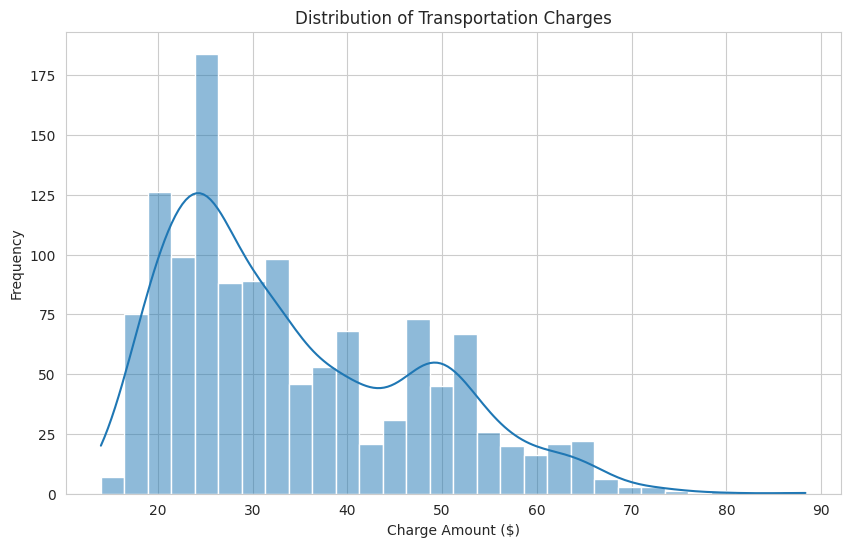

(count    1290.000000
 mean       34.275062
 std        13.176413
 min        13.970000
 25%        23.960000
 50%        30.850000
 75%        44.550000
 max        88.350000
 Name: transportation_charge_amount, dtype: float64,
        transportation_charge_amount  net_charge_amount  \
 count                   1290.000000        1290.000000   
 mean                      34.275062          27.417674   
 std                       13.176413           9.243247   
 min                       13.970000           3.280000   
 25%                       23.960000          20.382500   
 50%                       30.850000          26.225000   
 75%                       44.550000          33.200000   
 max                       88.350000          76.320000   
 
        multiweight_total_shipment_charge_amount  tracking_id_charge_amount  \
 count                                    1290.0                1290.000000   
 mean                                        0.0                   3.294411   
 

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Aesthetic style of the plots
sns.set_style("whitegrid")

# 1. Summarizing Transportation Charges
transportation_summary = fedex_data_cleaned['transportation_charge_amount'].describe()

# 2. Additional Charges: We'll consider the most common ones listed as different descriptions
additional_charges = fedex_data_cleaned.filter(like='charge_amount').describe()

# Plot the distribution of transportation charges
plt.figure(figsize=(10, 6))
sns.histplot(fedex_data_cleaned['transportation_charge_amount'], bins=30, kde=True)
plt.title('Distribution of Transportation Charges')
plt.xlabel('Charge Amount ($)')
plt.ylabel('Frequency')
plt.show()

transportation_summary, additional_charges


**Insights :**
1. The distribution of transportation charges is somewhat right-skewed, indicating that while most shipments cost around 30 to 45 dollars, there are a few high-cost shipments that can go up to about $88.

2. **Net Charge Amount:** Reflects the net fees after discounts and surcharges, averaging around $27.42 per shipment.

3. **Tracking ID Charge Amount:**

- **Fuel Surcharge** (most common additional charge listed): Average about '$3.29' per shipment, with values ranging from 0.33 to 8.64 dollars.

- **Residential Delivery** (if this corresponds to tracking_id_charge_amount_1):
Average cost of about 5.35 dollars, which is consistent across many shipments, as indicated by a low standard deviation.
- **Performance Pricing**
 (potentially tracking_id_charge_amount_2):
These are typically negative values (possibly credits or discounts), with an average of -$14.26 per shipment.



**Time Series Analysis:** Evaluate how shipping charges and volumes change over time.

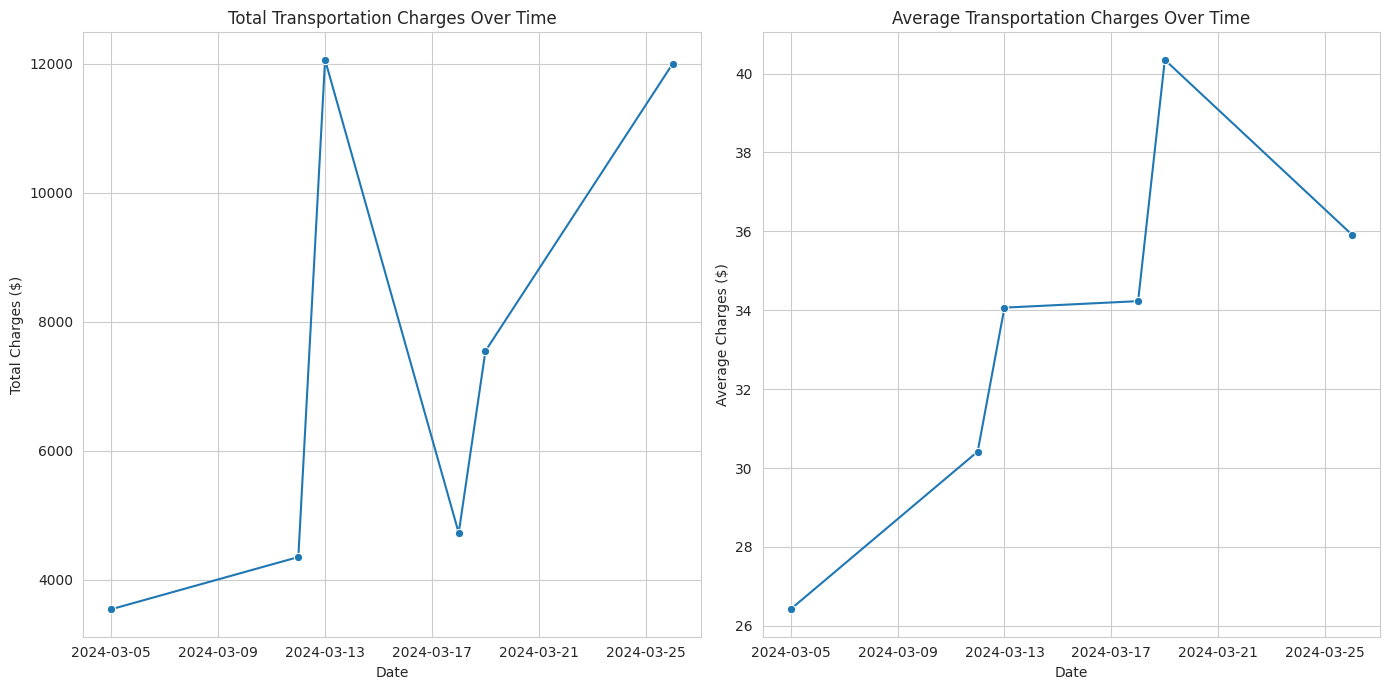

,invoice_date,total_charges,average_charges,shipment_count
count,6,6.000000,6.000000,6.000000
mean,2024-03-15 12:00:00,7369.138333,33.566954,215.000000
min,2024-03-05 00:00:00,3540.470000,26.421418,134.000000
25%,2024-03-12 06:00:00,4443.392500,31.330760,139.250000
50%,2024-03-15 12:00:00,6134.450000,34.148456,165.000000
75%,2024-03-18 18:00:00,10883.355000,35.495076,297.250000
max,2024-03-26 00:00:00,12059.430000,40.347914,354.000000
std,NaN,3852.552087,4.757318,101.921538


In [ ]:
# Grouping the data by invoice date and calculating the total and average transportation charges
time_series_data = fedex_data_cleaned.groupby(fedex_data_cleaned['invoice_date']).agg(
    total_charges=pd.NamedAgg(column='transportation_charge_amount', aggfunc='sum'),
    average_charges=pd.NamedAgg(column='transportation_charge_amount', aggfunc='mean'),
    shipment_count=pd.NamedAgg(column='transportation_charge_amount', aggfunc='count')
).reset_index()

# Plotting total and average transportation charges over time
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
sns.lineplot(data=time_series_data, x='invoice_date', y='total_charges', marker='o')
plt.title('Total Transportation Charges Over Time')
plt.xlabel('Date')
plt.ylabel('Total Charges ($)')

plt.subplot(1, 2, 2)
sns.lineplot(data=time_series_data, x='invoice_date', y='average_charges', marker='o')
plt.title('Average Transportation Charges Over Time')
plt.xlabel('Date')
plt.ylabel('Average Charges ($)')

plt.tight_layout()
plt.show()

# Displaying the summarized data
time_series_data.describe()


Observations:

- The total and average transportation charges have varied over the time period available in the data.

- **Total Charges:** Fluctuate significantly over time, with a peak of approximately 12,059 dollars and a low of around 3,540 dollars. This suggests variations in either the number of shipments or the cost per shipment across different periods.

- **Average Charges:** Also show variability, ranging from about 26 to 40 dollars. This indicates changes in the type or distance of shipments over time.

- **Shipment Count:** The number of shipments per invoice date ranges from 134 to 354, which might correlate with the fluctuations in total charges.

**Geographical Analysis:** Look at charges by zip codes or regions to see if certain areas have higher shipping costs or volumes.

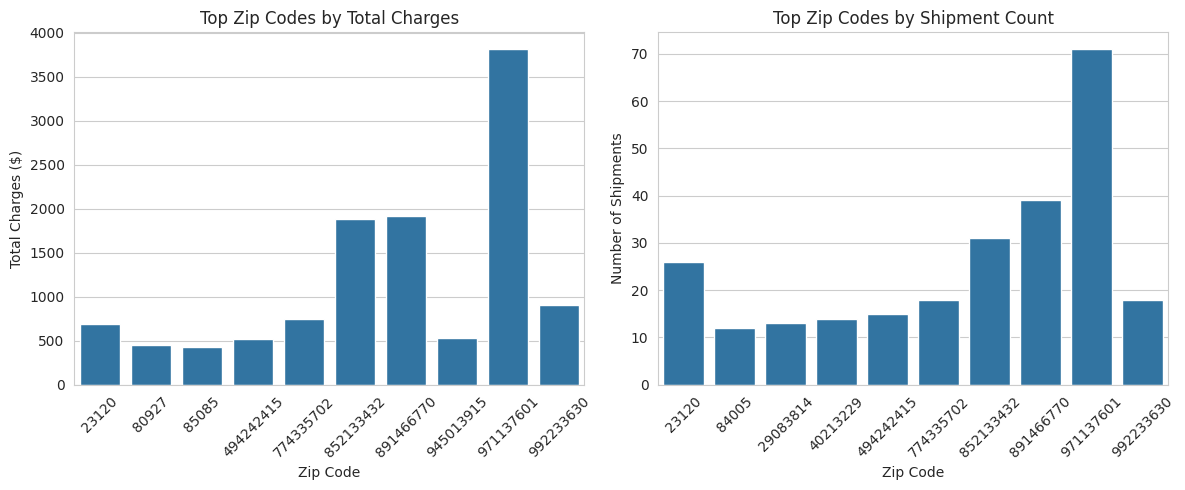

(     recipient_zip_code  total_charges  average_charges  shipment_count
 404           971137601        3812.55        53.697887              71
 361           891466770        1921.72        49.274872              39
 348           852133432        1885.42        60.820000              31
 416           992233630         900.24        50.013333              18
 315           774335702         748.48        41.582222              18
 4                 23120         694.84        26.724615              26
 392           945013915         526.18        52.618000              10
 251           494242415         521.06        34.737333              15
 21                80927         449.27        44.927000              10
 25                85085         433.46        54.182500               8,
      recipient_zip_code  total_charges  average_charges  shipment_count
 404           971137601        3812.55        53.697887              71
 361           891466770        1921.72        49.

In [ ]:
# Grouping data by recipient zip code to analyze geographical distribution of shipments
geo_data = fedex_data_cleaned.groupby('recipient_zip_code').agg(
    total_charges=pd.NamedAgg(column='transportation_charge_amount', aggfunc='sum'),
    average_charges=pd.NamedAgg(column='transportation_charge_amount', aggfunc='mean'),
    shipment_count=pd.NamedAgg(column='transportation_charge_amount', aggfunc='count')
).reset_index()

# Sorting data to find top zip codes by total charges and shipment counts
top_zip_by_charges = geo_data.sort_values(by='total_charges', ascending=False).head(10)
top_zip_by_shipment_count = geo_data.sort_values(by='shipment_count', ascending=False).head(10)

# Plotting top zip codes by total charges
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.barplot(x='recipient_zip_code', y='total_charges', data=top_zip_by_charges)
plt.title('Top Zip Codes by Total Charges')
plt.xlabel('Zip Code')
plt.ylabel('Total Charges ($)')
plt.xticks(rotation=45)

# Plotting top zip codes by shipment count
plt.subplot(1, 2, 2)
sns.barplot(x='recipient_zip_code', y='shipment_count', data=top_zip_by_shipment_count)
plt.title('Top Zip Codes by Shipment Count')
plt.xlabel('Zip Code')
plt.ylabel('Number of Shipments')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

top_zip_by_charges, top_zip_by_shipment_count


**Observations:**
- **Top Zip Codes by Total Charges:**

Zip code **971137601** stands out with the highest total charges of $3,812.55 and the most shipments at 71. This indicates a high activity level and possibly higher cost per shipment in this area.
Other top zip codes like 891466770 and 852133432 also show high total charges, indicating regions with either frequent shipping or higher cost shipments.

- **Top Zip Codes by Shipment Count:**

The shipment count is generally highest in the same zip codes that incur the highest charges, confirming these areas as key shipping hubs or customer bases.
Smaller areas like zip code 23120, despite having a moderate number of shipments (26), incur significantly lower total charges, suggesting lower cost per shipment or lighter/smaller packages generally.

Finding city and state with the highest number of shipments based on zip code

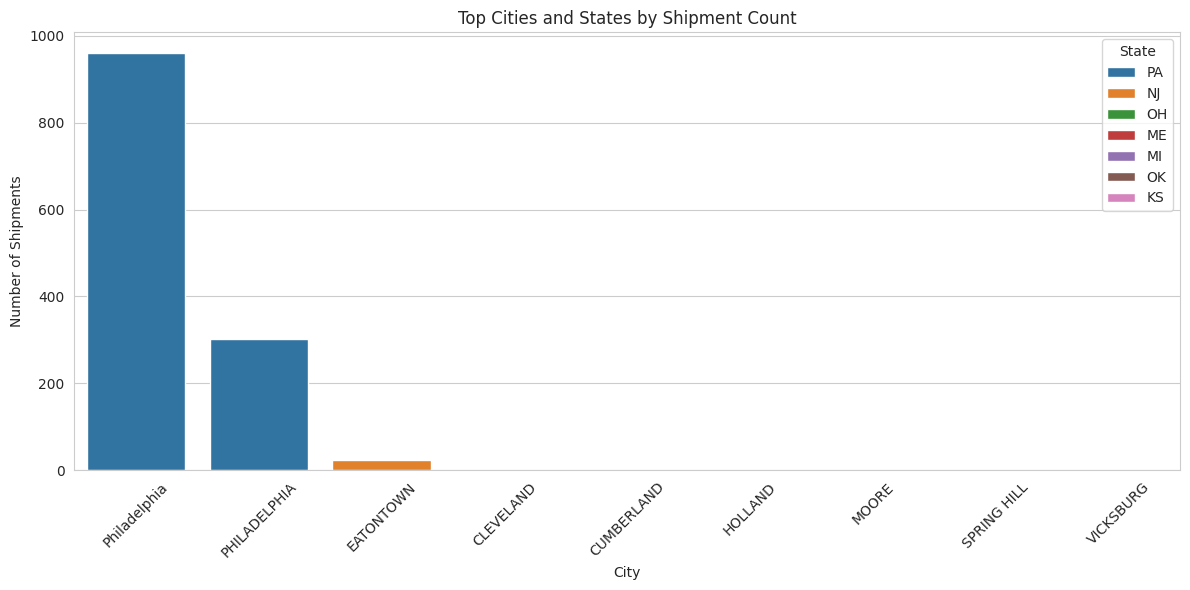

,original_recipient_city,original_recipient_state,shipment_count
6,Philadelphia,PA,960
5,PHILADELPHIA,PA,301
2,EATONTOWN,NJ,23
0,CLEVELAND,OH,1
1,CUMBERLAND,ME,1
3,HOLLAND,MI,1
4,MOORE,OK,1
7,SPRING HILL,KS,1
8,VICKSBURG,MI,1


In [ ]:
# Grouping data by original recipient city and state to analyze distribution of shipments
city_state_data = fedex_data_cleaned.groupby(['original_recipient_city', 'original_recipient_state']).agg(
    shipment_count=pd.NamedAgg(column='transportation_charge_amount', aggfunc='count')
).reset_index()

# Sorting data to find the top cities and states by shipment count
top_city_state_by_shipment = city_state_data.sort_values(by='shipment_count', ascending=False).head(10)

# Plotting top cities and states by shipment count
plt.figure(figsize=(12, 6))
sns.barplot(x='original_recipient_city', y='shipment_count', hue='original_recipient_state', data=top_city_state_by_shipment)
plt.title('Top Cities and States by Shipment Count')
plt.xlabel('City')
plt.ylabel('Number of Shipments')
plt.xticks(rotation=45)
plt.legend(title='State')
plt.tight_layout()
plt.show()

top_city_state_by_shipment


**Observations:**

- **Philadelphia, PA** stands out as the city and state with the highest number of shipments, with a combined total of 1,261 shipments across two entries (due to case differences in the city name).

- Other cities like Eatontown, NJ have significantly fewer shipments, with the next highest being only 23.

- This data highlights Philadelphia, PA, as a major hub for shipping activities, suggesting a high concentration of customers or businesses in this area.

**Weight and Dimension Analysis:**
Investigating how the weight and dimensions of shipments correlate with the charges.

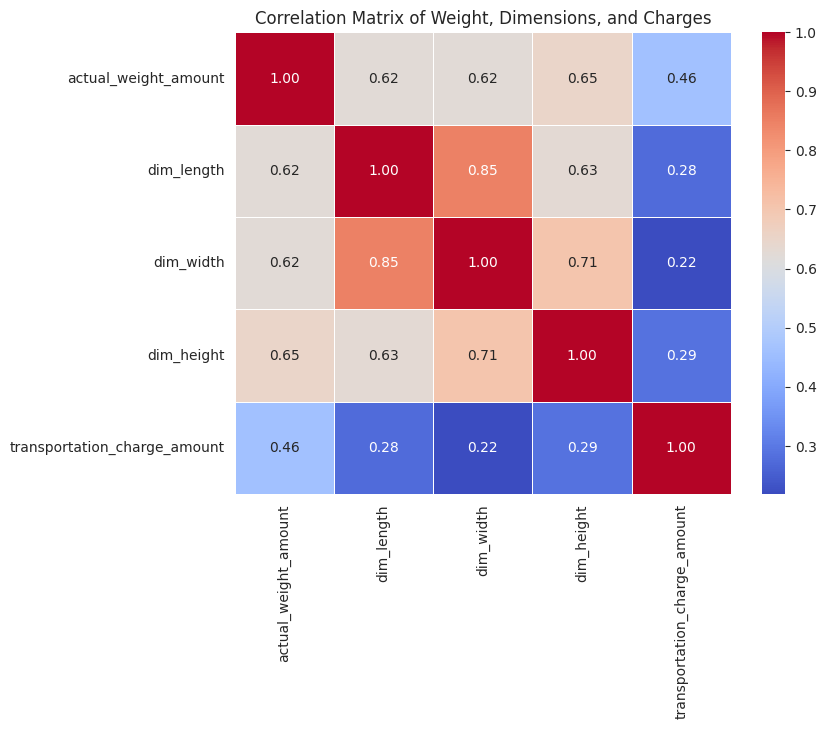

,actual_weight_amount,dim_length,dim_width,dim_height,transportation_charge_amount
actual_weight_amount,1.000000,0.622224,0.622067,0.651284,0.459639
dim_length,0.622224,1.000000,0.850088,0.628372,0.275876
dim_width,0.622067,0.850088,1.000000,0.706081,0.218215
dim_height,0.651284,0.628372,0.706081,1.000000,0.287406
transportation_charge_amount,0.459639,0.275876,0.218215,0.287406,1.000000


In [ ]:
# Selecting relevant columns for weight and dimension analysis
weight_dimension_data = fedex_data_cleaned[['actual_weight_amount', 'dim_length', 'dim_width', 'dim_height', 'transportation_charge_amount']]

# Calculating correlation matrix
correlation_matrix = weight_dimension_data.corr()

# Plotting correlations as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Weight, Dimensions, and Charges')
plt.show()

correlation_matrix


**Correlation Findings:**

**Actual Weight and Charges:**
- The correlation coefficient between the actual weight of shipments and transportation charges is approximately 0.46, **indicating a moderate positive correlation. Heavier shipments tend to have higher transportation costs.**

**Dimensions and Charges:**
- **Length and Charges:** Correlation is around 0.28, suggesting a **mild positive relationship.**

- **Width and Charges:** Slightly weaker correlation at about 0.22.

- **Height and Charges:** Similar to length, with a correlation of 0.29.

These correlations suggest that while **weight has a more significant impact on transportation charges than dimensions**, all measures show some level of positive correlation with the costs, **indicating that larger and heavier shipments generally incur higher shipping fees.**

**Service Type Analysis**

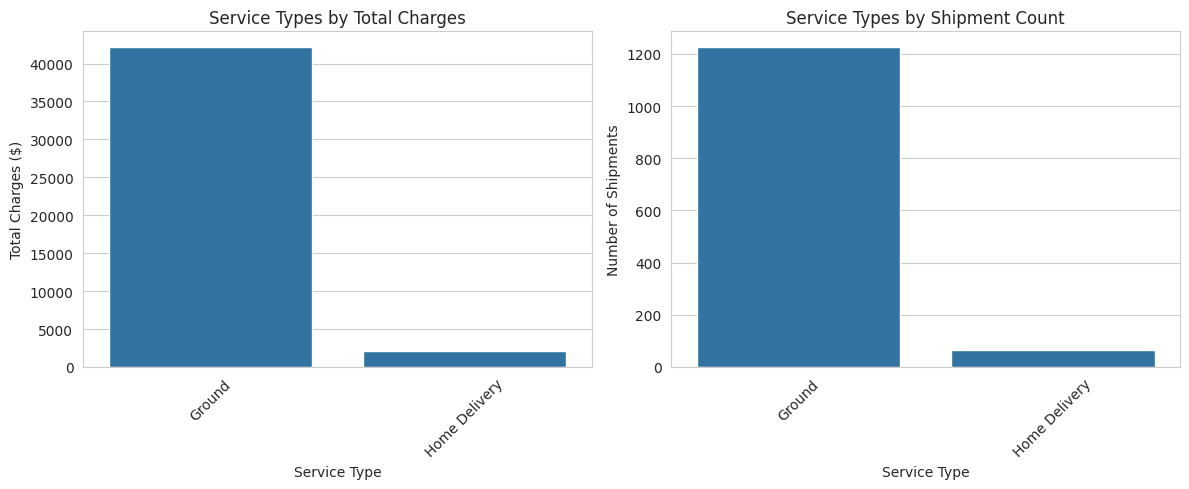

(    service_type  total_charges  average_charges  shipment_count
 0         Ground       42138.81        34.399029            1225
 1  Home Delivery        2076.02        31.938769              65,
     service_type  total_charges  average_charges  shipment_count
 0         Ground       42138.81        34.399029            1225
 1  Home Delivery        2076.02        31.938769              65)

In [ ]:
# Grouping data by service type to analyze distribution and costs associated with each type
service_type_data = fedex_data_cleaned.groupby('service_type').agg(
    total_charges=pd.NamedAgg(column='transportation_charge_amount', aggfunc='sum'),
    average_charges=pd.NamedAgg(column='transportation_charge_amount', aggfunc='mean'),
    shipment_count=pd.NamedAgg(column='transportation_charge_amount', aggfunc='count')
).reset_index()

# Sorting data to find top service types by total charges and shipment counts
top_service_types_by_charges = service_type_data.sort_values(by='total_charges', ascending=False)
top_service_types_by_shipment_count = service_type_data.sort_values(by='shipment_count', ascending=False)

# Plotting top service types by total charges
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.barplot(x='service_type', y='total_charges', data=top_service_types_by_charges)
plt.title('Service Types by Total Charges')
plt.xlabel('Service Type')
plt.ylabel('Total Charges ($)')
plt.xticks(rotation=45)

# Plotting top service types by shipment count
plt.subplot(1, 2, 2)
sns.barplot(x='service_type', y='shipment_count', data=top_service_types_by_shipment_count)
plt.title('Service Types by Shipment Count')
plt.xlabel('Service Type')
plt.ylabel('Number of Shipments')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

top_service_types_by_charges, top_service_types_by_shipment_count


**Observations:**

**Service Types:**
- The dataset primarily includes two service types: Ground and Home Delivery.

**Ground Service:**
- Dominates both in terms of total charges and shipment counts, with a total of 42,138.81 dollars in charges across 1,225 shipments.
- The average charge per Ground shipment is approximately $34.40.

**Home Delivery:**
- Much less frequent, with only 65 shipments totaling 2,076.02 dollars.
- The average charge per Home Delivery shipment is around $31.94.